### 数据处理小练习


#### 第一题：下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来。

In [1]:
import pandas as pd
import numpy as np
import talib as tb
import matplotlib.pyplot as plt

In [2]:
# 将Excel文件读取成ExcelFile格式
xls = pd.ExcelFile('sz50.xlsx')

# 获取多个sheet表的名称，生成列表sht
sht = xls.sheet_names

# 读取所有sheet的数据，存储在字典中，字典以sheet的名称作为key，以sheet的内容作为对应的value
data = pd.read_excel(xls, sheetname=sht, index_col='datetime', na_values='NA')

# 依照题意打印keys
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


#### 第二题：读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值

In [5]:
# 读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式
df600036 = data['600036.XSHG']
close = np.array(df600036['close'])

# 用talib计算10日均线值，返回ndarray的最后五个值
MA10 = tb.MA(close, timeperiod=10) 
print(type(MA10))
print(MA10[-5:])

<class 'numpy.ndarray'>
[ 108.35   108.741  109.176  110.102  111.666]


#### 第三题：将MA的ndarray数据格式转换成Series格式，并加上datetime索引，最后将价格和MA值用Matplotlib展示出来

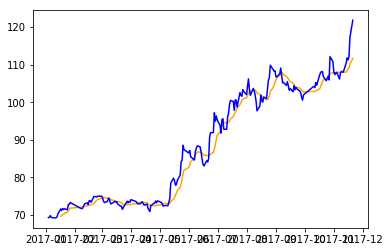

In [6]:
MA10 = pd.Series(MA10, index = df600036.close.index)
plt.plot(MA10, color = 'orange')
plt.plot(df600036.close, color = 'blue')
plt.show()

#### 第四题：用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的ROCR100（参数timeperiod=5）用一张图显示出来

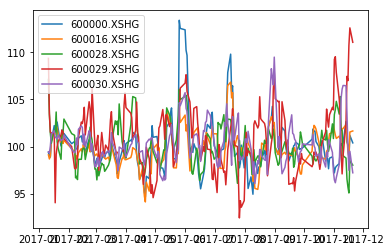

In [7]:
# 其中有sheet是空值的话会报错，用try-except可以增强代码鲁棒性
# 通过循环可以获取有序字典的键key和值value，将value中close列转成ndarray的形式传给tb.ROCR，计算得到一列ndarray，再转成Series保存进字典
# 循环后，将得到的字典保存为dataframe
# df的columns是不同的股票代码，提取出来保存为list，以方便调取前5只股票的数据

ROCR100 = {}
for key, value in data.items():
    try:
        index = value.index
        ROCR100[key] = pd.Series(tb.ROCR100(value.close.values, timeperiod = 5), index = index)
    except AttributeError:
        pass
df = pd.DataFrame(ROCR100)

code = df.columns.values.tolist()
for k in range(5):
    plt.plot(df[code[k]], label = code[k])
plt.legend()
plt.show()

#### 第五题：用Panel来计算50支股票的MACD，并且输出MACD的Panel的MultiIndex格式

In [9]:
# 依然是用try-except增加鲁棒性
# 通过循环可以获取有序字典的键key和值value，并将value转化成dataframe赋给code_data,确定其index并新增三列MACD指标值
# 循环后得到dict_MACD字典，保留MACD指标值，key为股票代码，value为对应的index与指标值
# 通过pd.Panel将字典转化为面板数据，此时items为原来的key即股票代码，major_xs为原来的index即日期，minor_xs为变量（MACD指标）
# 通过pd.transpose转化面板数据分层的方式

dict_MACD = {}
for key,value in data.items():
    code_data = pd.DataFrame(value)
    try:
        code_data.index=value.index
        code_data['macd'], code_data['macdsignal'], code_data['macdhist'] = tb.MACD(code_data.close, fastperiod=12, slowperiod=26, signalperiod=9)
        dict_MACD[key] = code_data[['macd','macdsignal','macdhist']]
    except AttributeError:
        pass
panel_MACD = pd.Panel(dict_MACD)
tran_MACD = panel_MACD.transpose(2,1,0)
MACD_data = tran_MACD.to_frame()
MACD_data

macd  macdsignal   macdhist
datetime            minor                                        
2017-02-24 15:00:00 600000.XSHG   0.871114    1.197907  -0.326792
                    600016.XSHG  -0.007077    0.265328  -0.272405
                    600028.XSHG   0.028081    0.052015  -0.023934
                    600029.XSHG   0.221787    0.132200   0.089587
                    600030.XSHG   0.602873    0.620235  -0.017362
                    600036.XSHG   1.291055    1.245643   0.045412
                    600048.XSHG   2.316978    1.771997   0.544982
                    600050.XSHG  -0.105248   -0.189278   0.084029
                    600100.XSHG   0.453028    0.079491   0.373537
                    600104.XSHG   2.271146    2.012658   0.258488
                    600111.XSHG   2.429090    1.926561   0.502529
                    600340.XSHG   8.025312    5.194384   2.830927
                    600518.XSHG   1.014290    2.387216  -1.372926
                    600519.XSHG  20.810882    7.146779  13.664103
                    600547.XSHG  -0.041687    0.918715  -0.960402
                    600606.XSHG   0.298737    0.267833   0.030904
                    600837.XSHG  -1.406916   -0.673088  -0.733828
                    600887.XSHG   7.150619    7.826700  -0.676082
                    600919.XSHG   0.203864    0.155884   0.047980
                    600999.XSHG   0.206569    0.203989   0.002579
                    601006.XSHG  -0.135435   -0.173164   0.037729
                    601088.XSHG   0.183388    0.266840  -0.083452
                    601166.XSHG   0.539498    0.661410  -0.121912
                    601169.XSHG   0.164487    0.169715  -0.005229
                    601186.XSHG   0.356202    0.373367  -0.017165
                    601198.XSHG   0.035657   -0.035817   0.071473
                    601211.XSHG   0.170293    0.168216   0.002077
                    601229.XSHG   0.420298    0.354342   0.065955
                    601288.XSHG   0.052733    0.051096   0.001637
                    601318.XSHG   0.588912    0.565824   0.023089
...                                    ...         ...        ...
2017-11-20 15:00:00 600958.XSHG  -0.017209   -0.030368   0.013159
                    600999.XSHG  -0.316469   -0.361278   0.044810
                    601006.XSHG  -0.031503   -0.035473   0.003970
                    601088.XSHG   1.028069    0.616766   0.411303
                    601166.XSHG  -0.397310   -0.514731   0.117421
                    601169.XSHG  -0.061091   -0.101625   0.040533
                    601186.XSHG  -0.102098   -0.051427  -0.050671
                    601198.XSHG  -0.240666   -0.276337   0.035671
                    601211.XSHG  -0.228540   -0.260129   0.031589
                    601229.XSHG  -0.569227   -0.348796  -0.220430
                    601288.XSHG  -0.050925   -0.046703  -0.004222
                    601318.XSHG   9.177855    7.405553   1.772302
                    601328.XSHG  -0.078237   -0.087515   0.009278
                    601336.XSHG   3.017400    2.223956   0.793444
                    601390.XSHG  -0.051329    0.003959  -0.055288
                    601398.XSHG  -0.042961   -0.034460  -0.008502
                    601601.XSHG   2.358322    1.947435   0.410887
                    601628.XSHG   1.516911    1.445633   0.071278
                    601668.XSHG  -0.064400   -0.036614  -0.027786
                    601688.XSHG  -0.487274   -0.473025  -0.014250
                    601766.XSHG   0.110179    0.231906  -0.121726
                    601788.XSHG  -0.133310   -0.125970  -0.007340
                    601800.XSHG  -0.328193   -0.232894  -0.095299
                    601818.XSHG  -0.010007   -0.022297   0.012290
                    601857.XSHG   0.020054    0.073234  -0.053180
                    601881.XSHG  -0.471919   -0.403344  -0.068574
                    601901.XSHG  -0.106860   -0.094530  -0.012330
                    601985.XSHG  -0.017573    0.024240  -0.041813
            

#### 参考链接：
##### 1. [如何用 pandas 读取 csv 和 Excel 数据](https://www.jianshu.com/p/ab539e9a7955)
##### 2.[Pandas、Numpy、Talib 的小知识点](https://blog.csdn.net/baidu_41902768/article/details/82861349)
#### 需要注意参考链接里有不对的地方，最最最重要的是，要自己多多思考多多尝试~